# Homework 04 - Daniel Teeuwsen

#### Excercise 1

Plot exactly two cycles of a sine curve, in any style you choose. Annotate one peak and one trough of the curve.

Is the curve smooth to your eye?

<div class="alert alert-block alert-info">
<b>Recall:</b> One quick way to generate data if you know ahead of time the number of data points you want to create is like by method <strong>A</strong>.
    
But if you don't know how many values you will be generating, or all the values ahead of time, then you can do it by appending data to a list as you go along, then converting it to a <tt>numpy.array</tt>, such as method <strong>B</strong>
</div>

**A**
```python
x,dx = numpy.linspace(start,stop,number,restep=True)
y = numpy.exp(-x) </code>
```
       
**B**
```python
xpoints = []
ypoints = []
for x in numpy.linspace(start,stop,number):
    xpoints.append(x)
    ypoints.append(numpy.exp(-x))
x = numpy.array(xpoints)
y = numpy.array(ypoints)
```

In [1]:
%matplotlib inline
import numpy             as np        # numpy functions must be used like `numpy.function`
import matplotlib.pyplot as myPlot    # matplotlib funcitons must be used like `plot.function`

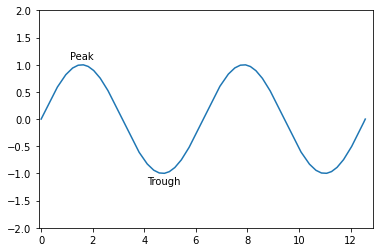

In [2]:
myPlot.style.use('fast')
x,stepSize = np.linspace(0,4*np.pi,1000, retstep=True)
y = np.sin(x)
myPlot.plot(x,y)
myPlot.axis([-0.1,4.1*np.pi,-2,2])
myPlot.annotate('Peak',(1.1,1.1))
myPlot.annotate('Trough',(4.1,-1.2))
myPlot.show()

#### Excercise 2
The files `dow.txt` and `sunspots.txt` are ordinary text files. You may open them in Word to find check.

Plot the `sunspot.txt` file again, but this time use the `unpack` option of `numpy.loadtxt` to avoid the need to slice the data. Do not use variables `x` or `y`, but directly use the multi-dimensional data returned from `numpy.loadtxt` into `plot.plot` Modify the plot to only plot the first 750 data points.

<div class="alert alert-block alert-info">
<b>Tip:</b> The unix command <tt>file</tt> is the best way to check what type of file format your datafile is.
    
<strong>On Macintosh or Linux:</strong> Open a terminal and type: <tt>file <it>filename</it></tt>
    
<strong>On Windows:</strong> Install <a href="http://gnuwin32.sourceforge.net/packages/file.htm">File for Windows</a>. Open a Command Prompt, and drag the <tt>file</tt> command into the window from it's location at <tt>C:\Program Files (x86)\GnuWin32\bin</tt>. Then drag the file you want to check into the window, and press enter.
</div>

**Answer:** If the data is loaded into variable `d`, then `d[0]` will be the x-axis data, `d[1]` will be the y-axis data, and `d[0,:750]` will be the first 750 points of that data.

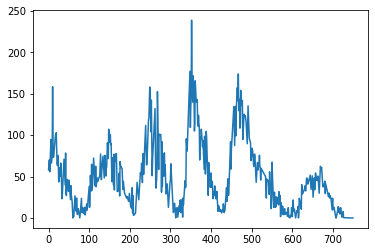

In [3]:
mySunSpotData = np.loadtxt("sunspots.txt", float, unpack=True)
myPlot.plot(mySunSpotData[0, :750],mySunSpotData[1, :750])
myPlot.show()

### Excercise 3

Plot the data from the `sunspot.txt` file again, but this time plot a running average of the data, defined by

$$y_k = \frac{1}{2r+1}\sum^{r}_{m=-r}y_{k+m}$$

where $r=5$. Plot the first 500 data points of the original data and running average on the same graph.

Finally, use the command 
```python
    plot.savefig("sunspot_plot.pdf",format="pdf")
```
before your `plot.show()` to save a pdf of your plot.

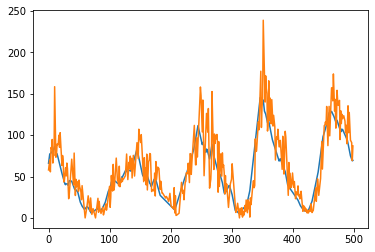

In [4]:
r = 5
numPoints = 500
i = r
avgList = []

while i < numPoints+r:
    pointAvg = 0
    for j in mySunSpotData[1,i-5:i+5]:
        pointAvg = pointAvg + j
    avgList.append(pointAvg/(2*r+1))
    i = i+1

avgList = np.array(avgList)
myPlot.plot(mySunSpotData[0,0:500],avgList)
myPlot.plot(mySunSpotData[0, :500],mySunSpotData[1, :500])
myPlot.savefig("sunspot_plot_Daniel.pdf",format="pdf")
myPlot.show()

### Excercise 4

Make a plot of the so-called deltoid curve, which is a paramteric curve defined by

$$x=2\cos\theta+\cos2\theta,\ \ y=2\sin\theta-\sin2\theta$$

where $0\leq\theta\lt\theta$. Take a set of values of $\theta$ between these limits and calculate $x$ and $y$ for each of them, then plot $y$ as a function of $x$.

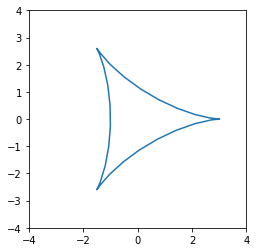

In [5]:
thetaValues = np.linspace(0,2*np.pi,1000)
xValues = []
yValues = []

for theta in thetaValues:
    xValues.append(2*np.cos(theta)+np.cos(2*theta))
    yValues.append(2*np.sin(theta)-np.sin(2*theta))
myPlot.xlim(-4, 4)
myPlot.ylim(-4, 4)
myPlot.gca().set_aspect('equal', adjustable='box')
myPlot.plot(xValues,yValues)
myPlot.show()

Since the relation does not pass the vertical line test, it is technically not a function. The relation can however be represented as: $ (x^2 + y^2)^2 + 18\cdot(x^2 + y^2) - 27 = 8\cdot(x^3-3xy^2) $

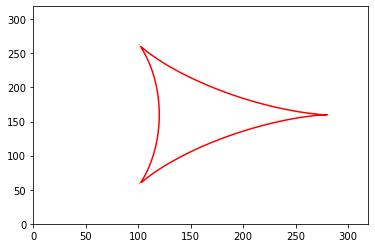

In [6]:
xrange = np.arange(-4, 4, 0.025)
yrange = np.arange(-4, 4, 0.025)
x, y = np.meshgrid(xrange,yrange)
myPlot.contour((x**2+y**2)**2+18*(x**2+y**2)-27-8*(x**3-3*x*y**2),[0],colors='red')